# ANALYSIS BASED ON SPOTIFY DATASET

IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASET

In [ ]:
df = pd.read_csv("spotify.csv", encoding="ISO-8859-1")

In [9]:
df

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


UNDERSTAND EACH COLUMN

In [8]:
df.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

Column meanings:
- title: Song title
- artist: Artist name
- top genre: Genre of the song
- year: Release year
- bpm: Beats per minute (tempo)
- nrgy: Energy level
- dnce: Danceability
- dB: Loudness
- live: Likelihood of live performance
- val: Positiveness
- dur: Duration (seconds)
- acous: Acousticness
- spch: Speechiness
- pop: Popularity score

GET THE INFORMATION OF COLUMNS

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


Understand the data inside the dataframe using head()

In [14]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


# DATA CLEANING

1. Check and remove duplicates

In [15]:
print("Duplicates exist:", df.duplicated().any())
df = df.drop_duplicates()

Duplicates exist: False


2. Check for null values

In [16]:
print("Null values:\n", df.isnull().sum())

Null values:
 title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64


3. Drop 'Unnamed: 0' column

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

# DATA TRANSFORMATION

1. Rename columns for easier access

In [17]:
df = df.rename(columns={
    'top genre': 'genre',
    'title': 'song_title',
    'artist': 'artist_name',
    'bpm': 'tempo',
    'nrgy': 'energy',
    'dnce': 'danceability',
    'dB': 'loudness',
    'live': 'live_perf',
    'val': 'valence',
    'dur': 'duration',
    'acous': 'acousticness',
    'spch': 'speechiness',
    'pop': 'popularity'
})

2. Create a tempo category column

In [19]:
df['tempo_category'] = pd.cut(df['tempo'], bins=[0, 90, 120, 180], labels=['slow', 'moderate', 'fast'])

3. Change order of columns

In [20]:
df = df[['song_title', 'artist_name', 'genre', 'year', 'tempo', 'tempo_category', 'energy', 'danceability',
         'loudness', 'live_perf', 'valence', 'duration', 'acousticness', 'speechiness', 'popularity']]

# ANALYSIS

1. Songs with popularity > 85

In [ ]:
df[df['popularity'] > 85]

,song_title,artist_name,genre,year,tempo,tempo_category,energy,danceability,loudness,live_perf,valence,duration,acousticness,speechiness,popularity
139,Underneath the Tree,Kelly Clarkson,dance pop,2013,160,fast,81,51,-5,21,69,230,0,5,88
210,All of Me,John Legend,neo mellow,2014,120,moderate,26,42,-7,13,33,270,92,3,86
443,Shape of You,Ed Sheeran,pop,2017,96,moderate,65,83,-3,9,93,234,58,8,87
444,Closer,The Chainsmokers,electropop,2017,95,moderate,52,75,-6,11,66,245,41,3,86
508,One Kiss (with Dua Lipa),Calvin Harris,dance pop,2018,124,fast,86,79,-3,8,59,215,4,11,86
572,Memories,Maroon 5,pop,2019,91,moderate,32,76,-7,8,57,189,84,5,99
573,Lose You To Love Me,Selena Gomez,dance pop,2019,102,moderate,34,51,-9,21,9,206,58,4,97
574,Someone You Loved,Lewis Capaldi,pop,2019,110,moderate,41,50,-6,11,45,182,75,3,96
575,Señorita,Shawn Mendes,canadian pop,2019,117,moderate,54,76,-6,9,75,191,4,3,95
576,How Do You Sleep?,Sam Smith,pop,2019,111,moderate,68,48,-5,8,35,202,15,9,93


2. Number of songs per genre

In [22]:
df['genre'].value_counts()

genre
dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
australian dance               6
hip pop                        6
australian pop                 5
atl hip hop                    5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
escape room                    2
acoustic pop                   2
indie pop                      2
detroit hip hop                2
candy pop                      2
downtempo                      2
brostep                        2
electronic trap                2
folk

3. Average tempo by year

In [23]:
df.groupby('year')['tempo'].mean()

year
2010    122.058824
2011    119.075472
2012    121.085714
2013    121.676056
2014    123.000000
2015    119.768421
2016    114.325000
2017    116.800000
2018    114.593750
2019    112.451613
Name: tempo, dtype: float64

4. Most energetic songs

In [ ]:
df.sort_values(by='energy', ascending=False).head()

,song_title,artist_name,genre,year,tempo,tempo_category,energy,danceability,loudness,live_perf,valence,duration,acousticness,speechiness,popularity
50,Hello,Martin Solveig,big room,2010,128,fast,98,67,-3,10,45,191,1,3,0
198,Pom Poms,Jonas Brothers,boy band,2013,148,fast,98,68,-2,28,90,198,7,9,52
181,Rock N Roll,Avril Lavigne,canadian pop,2013,184,NaN,96,47,-3,34,67,207,1,13,61
134,Don't Stop the Party (feat. TJR),Pitbull,dance pop,2012,127,fast,96,72,-4,38,95,206,1,9,59
430,Blown,DNCE,dance pop,2016,130,fast,95,63,-5,10,73,197,0,4,48


5. Songs with high acousticness and low danceability

In [25]:
df[(df['acousticness'] > 80) & (df['danceability'] < 50)]

,song_title,artist_name,genre,year,tempo,tempo_category,energy,danceability,loudness,live_perf,valence,duration,acousticness,speechiness,popularity
36,Bound To You - Burlesque Original Motion Pictu...,Christina Aguilera,dance pop,2010,164,fast,41,29,-5,13,7,264,83,3,61
44,You Lost Me,Christina Aguilera,dance pop,2010,43,slow,39,23,-6,14,7,257,85,4,56
96,Turning Page,Sleeping At Last,acoustic pop,2011,125,fast,38,30,-8,11,19,255,91,3,46
186,Clown,Emeli Sandé,dance pop,2013,130,fast,23,45,-8,11,23,221,92,4,60
210,All of Me,John Legend,neo mellow,2014,120,moderate,26,42,-7,13,33,270,92,3,86
249,Say Something,A Great Big World,neo mellow,2014,138,fast,15,45,-9,9,9,229,87,3,61
255,Not About Angels,Birdy,neo mellow,2014,116,moderate,14,41,-10,9,23,190,97,4,56
330,Mark My Words,Justin Bieber,canadian pop,2015,114,moderate,26,38,-9,17,52,134,88,3,63
436,Beautiful Birds (feat. Birdy),Passenger,folk-pop,2016,86,slow,17,39,-13,11,14,214,91,3,36
505,Free Me,Sia,australian dance,2017,87,slow,46,27,-4,14,21,286,85,3,44


6. Most common genre

In [26]:
df['genre'].mode()[0]

'dance pop'

7. Songs with fast tempo and high popularity

In [27]:
df[(df['tempo_category'] == 'fast') & (df['popularity'] >= 85)]

,song_title,artist_name,genre,year,tempo,tempo_category,energy,danceability,loudness,live_perf,valence,duration,acousticness,speechiness,popularity
139,Underneath the Tree,Kelly Clarkson,dance pop,2013,160,fast,81,51,-5,21,69,230,0,5,88
140,Wake Me Up,Avicii,big room,2013,124,fast,78,53,-6,16,64,247,0,5,85
508,One Kiss (with Dua Lipa),Calvin Harris,dance pop,2018,124,fast,86,79,-3,8,59,215,4,11,86
510,I Like It,Cardi B,pop,2018,136,fast,73,82,-4,37,65,253,10,13,85
578,Trampoline (with ZAYN),SHAED,electropop,2019,127,fast,46,62,-6,14,50,184,56,3,92
580,Truth Hurts,Lizzo,escape room,2019,158,fast,62,72,-3,12,41,173,11,11,90
585,Sucker,Jonas Brothers,boy band,2019,138,fast,73,84,-5,11,95,181,4,6,86


8. Average popularity by genre

In [29]:
df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

genre
escape room                  90.000000
brostep                      86.000000
alternative r&b              84.000000
irish singer-songwriter      81.000000
danish pop                   80.000000
celtic rock                  80.000000
electronic trap              79.500000
edm                          78.200000
canadian contemporary r&b    77.666667
electropop                   77.461538
contemporary country         76.000000
pop                          74.833333
electro                      74.500000
canadian hip hop             73.500000
detroit hip hop              73.500000
chicago rap                  73.000000
metropopolis                 73.000000
canadian pop                 72.235294
house                        72.000000
tropical house               71.666667
hip hop                      70.000000
electro house                70.000000
australian hip hop           70.000000
boy band                     69.666667
indie pop                    69.500000
baroque pop        

9. Correlation between popularity and energy

In [30]:
df['popularity'].corr(df['energy'])

np.float64(-0.05764503617766648)

10. Top 5 artists with most entries

In [31]:
df['artist_name'].value_counts().head()

artist_name
Katy Perry       17
Justin Bieber    16
Rihanna          15
Maroon 5         15
Lady Gaga        14
Name: count, dtype: int64

# VISUAL ANALYSIS

1. Genre count

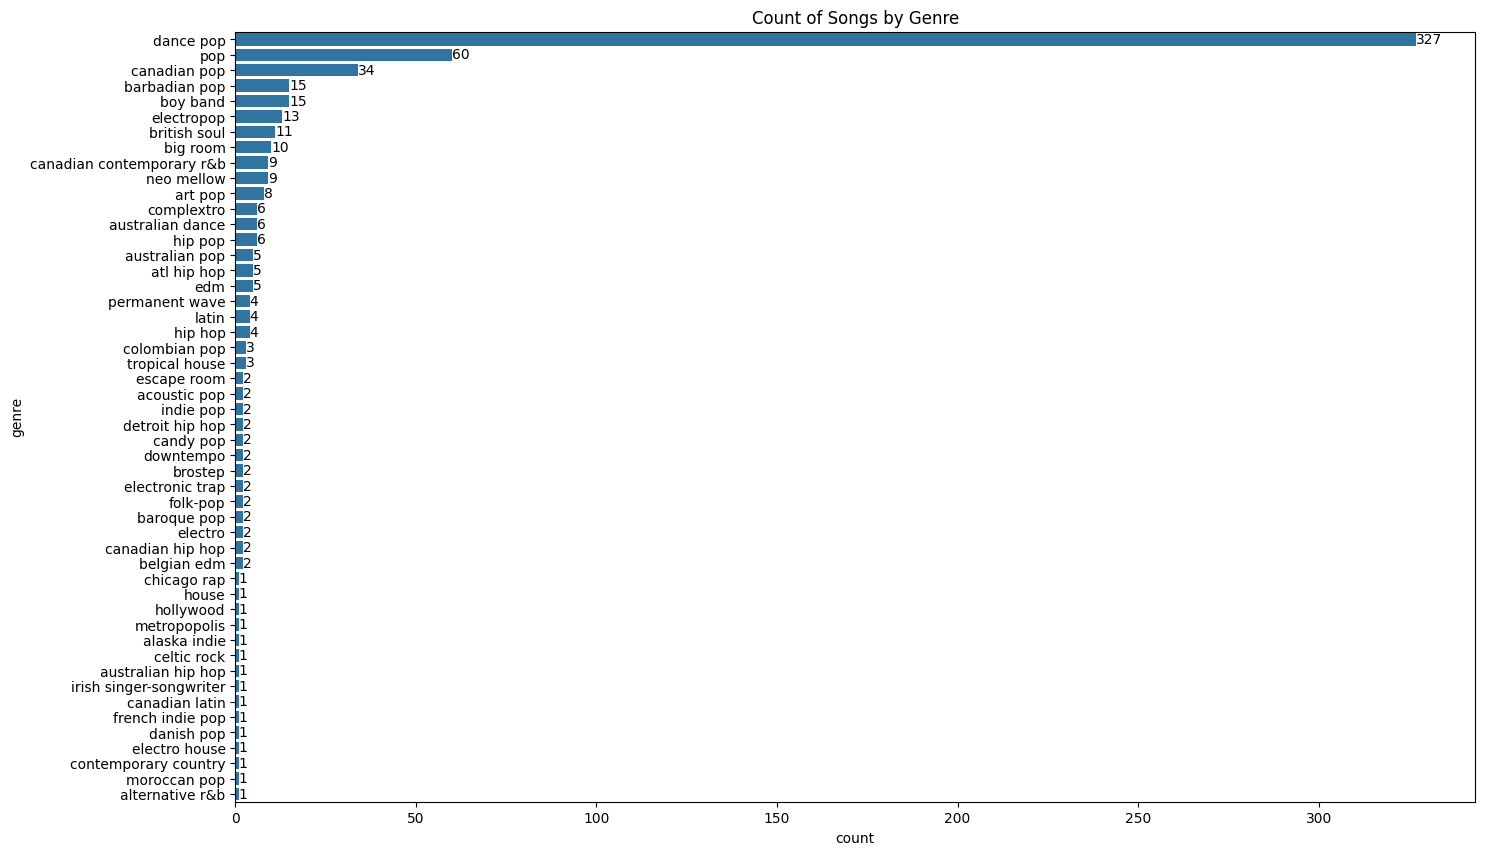

In [45]:
plt.figure(figsize=(16,10))
g = sns.countplot(data=df, y='genre', order=df['genre'].value_counts().index)
g.bar_label(g.containers[0])
plt.title("Count of Songs by Genre")
plt.show()

OBSERVATIONS:
 - Dance pop is the most prevalent genre in the dataset, with 327 songs.
 - Canadian pop and Barbadian pop follow with 60 and 34 songs respectively, indicating a strong presence of pop subgenres.

2. Distribution of tempo

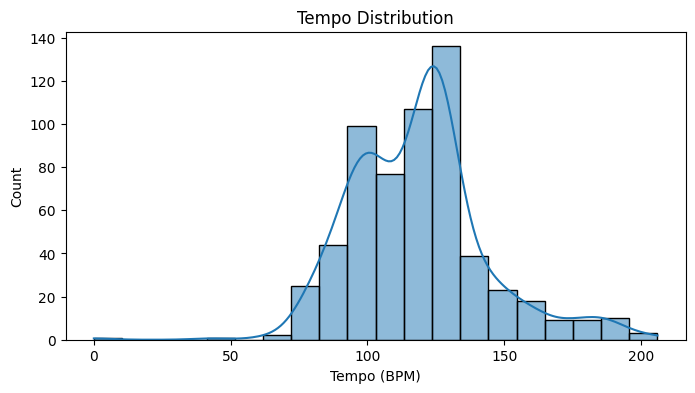

In [33]:
plt.figure(figsize=(8,4))
sns.histplot(df['tempo'], bins=20, kde=True)
plt.title("Tempo Distribution")
plt.xlabel("Tempo (BPM)")
plt.show()

OBSERVATIONS:
 - Most songs have a medium to fast tempo, mostly between 90 and 150 beats per minute (BPM)
 - Very few songs are extremely slow or extremely fast.

3. Popularity vs Energy

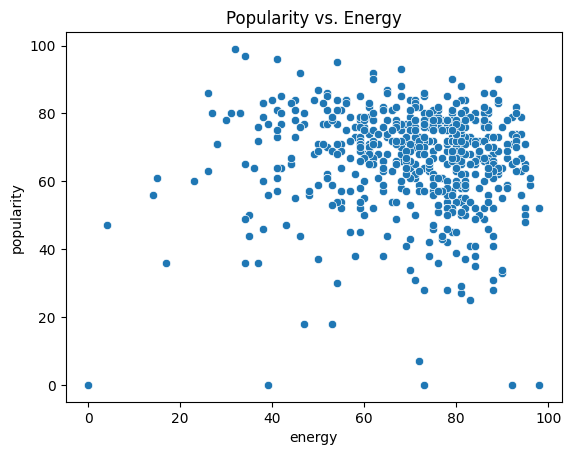

In [34]:
sns.scatterplot(x='energy', y='popularity', data=df)
plt.title("Popularity vs. Energy")
plt.show()

OBSERVATIONS:
 - As songs get more "energetic," their "popularity" also tends to be higher. 
 - However, some very energetic songs that aren't very popular and a few less energetic songs that are still quite popular.

4. Boxplot of popularity by tempo category

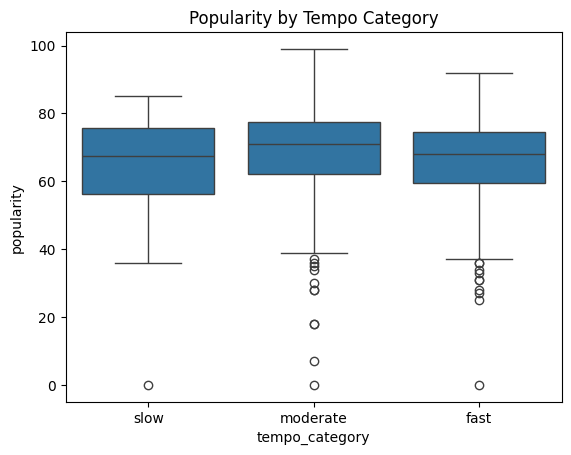

In [35]:
sns.boxplot(x='tempo_category', y='popularity', data=df)
plt.title("Popularity by Tempo Category")
plt.show()

OBSERVATIONS:
 - The "popularity" of songs is pretty similar across all tempo categories .
 - While there are some very unpopular songs in the moderate and fast categories.

5. Heatmap of correlations

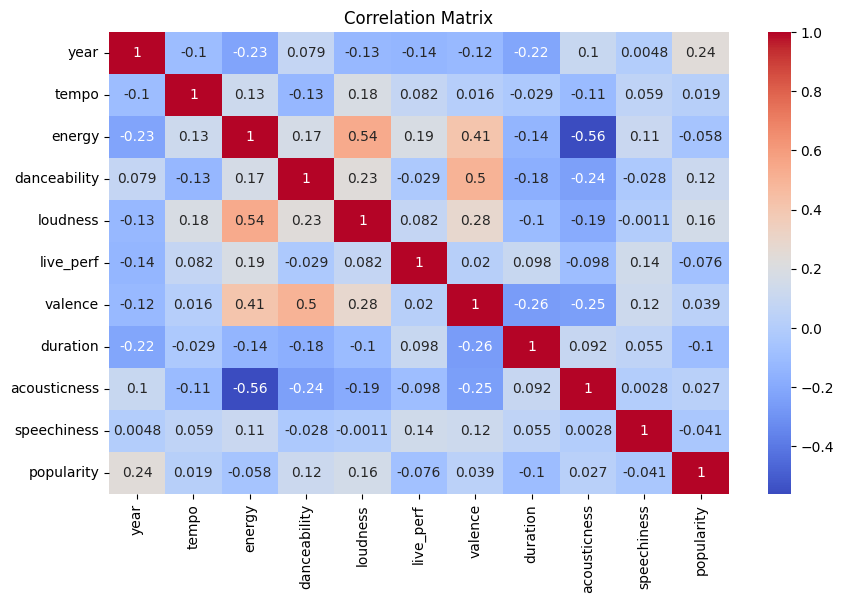

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

OBSERVATIONS:
 - Year and Popularity: Older songs tend to be slightly less popular.
 - Energy and Loudness: More energetic songs are usually louder.
 - Danceability and Energy: Songs that are easier to dance to tend to be more energetic and louder.
 - Acousticness and Energy: Songs that sound more "acoustic" are generally less energetic.
 - Acousticness and Popularity: Songs with higher acousticness tend to be slightly less popular.
 - Popularity: Popularity is influenced by many factors, not just these individual musical traits.

6. Average Popularity by Year

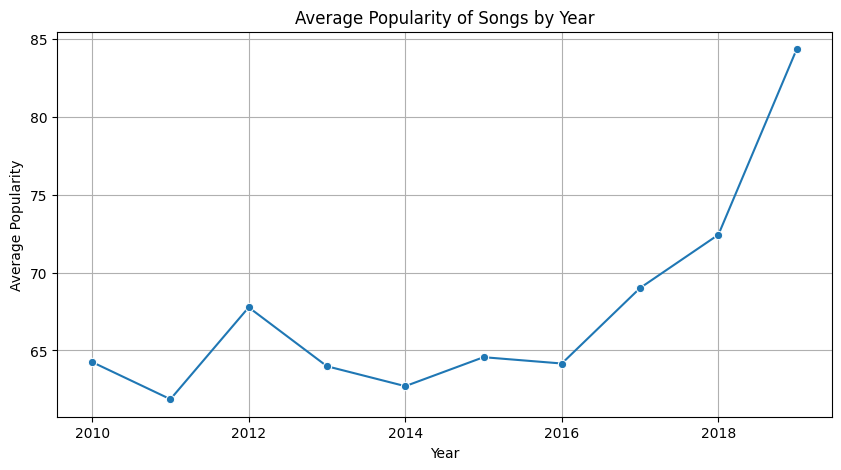

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby('year')['popularity'].mean().reset_index(), x='year', y='popularity', marker='o')
plt.title("Average Popularity of Songs by Year")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid(True)
plt.show()

OBSERVATIONS:
 - It was fairly steady and even dipped a bit between 2010 and 2016.
 - From 2016 onwards, there's a clear and strong increase in the average popularity of songs, with 2019 showing the highest average popularity.

7. Energy vs Danceability

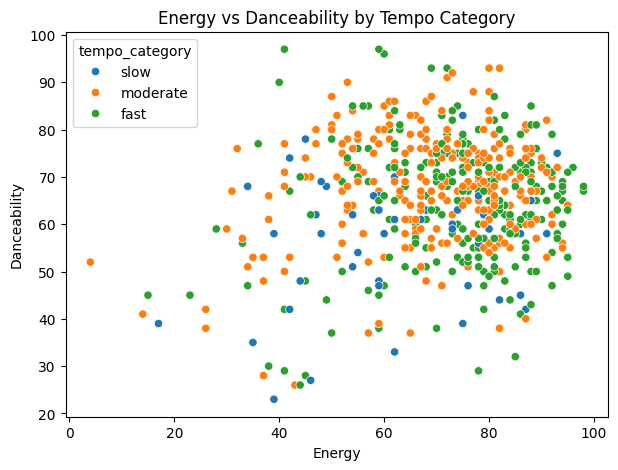

In [38]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='energy', y='danceability', hue='tempo_category')
plt.title("Energy vs Danceability by Tempo Category")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.show()

OBSERVATIONS:
 - Higher tempo often contributes to both energy and easy to dance to.
 - Slow songs are less concentrated in the very high energy and danceability areas.

8. Top 10 Artists with Most Songs

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12244\3734220972.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


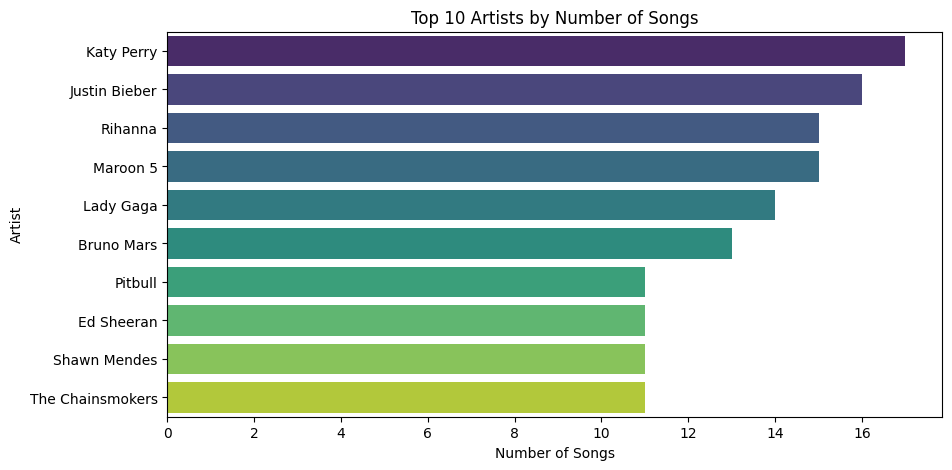

In [39]:
plt.figure(figsize=(10,5))
top_artists = df['artist_name'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title("Top 10 Artists by Number of Songs")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.show()

OBSERVATIONS:
 - Katy Perry has the most songs in this collection, followed closely by Justin Bieber. 
 - Rihanna and Maroon 5 also have a good number of songs.

9. Loudness Distribution

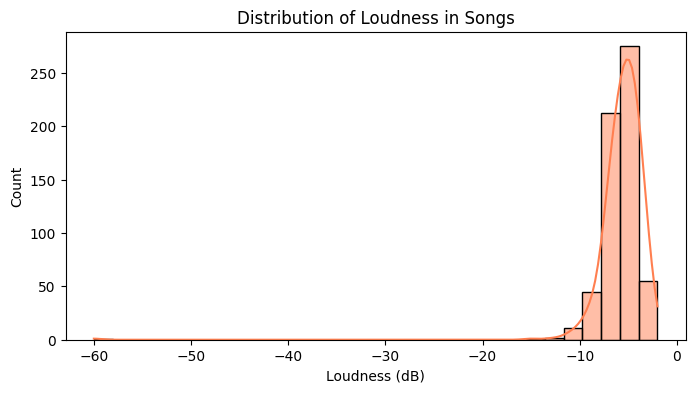

In [40]:
plt.figure(figsize=(8,4))
sns.histplot(df['loudness'], bins=30, kde=True, color='coral')
plt.title("Distribution of Loudness in Songs")
plt.xlabel("Loudness (dB)")
plt.show()

OBSERVATIONS:
 - Most of the songs in this dataset are quite loud.
 - The loudness of most songs is clustered around -5 dB.

10. Boxplot of Acousticness by Genre (Top 10 Genres)

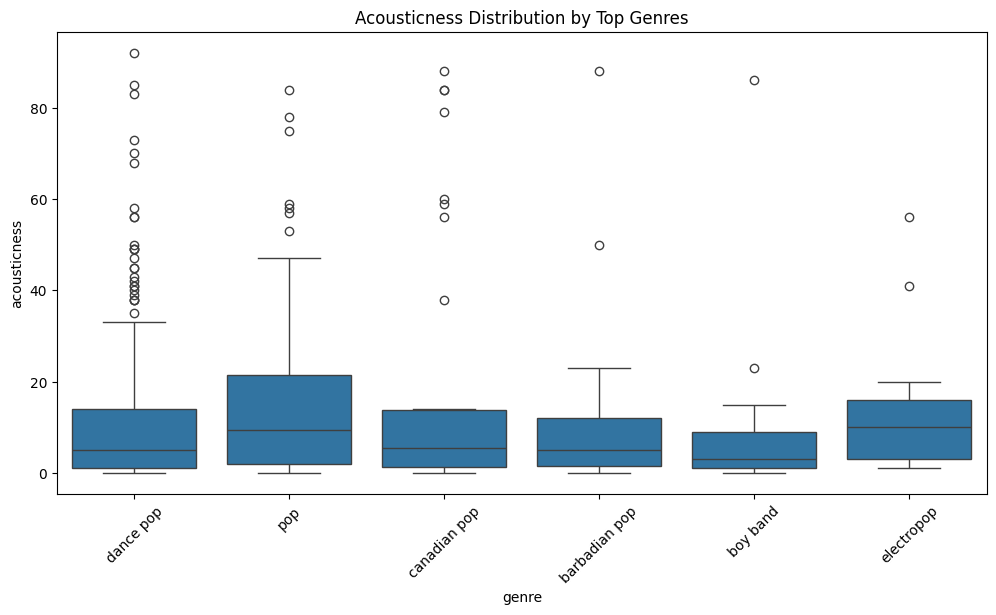

In [41]:
top_genres = df['genre'].value_counts().nlargest(6).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['genre'].isin(top_genres)], x='genre', y='acousticness')
plt.title("Acousticness Distribution by Top Genres")
plt.xticks(rotation=45)
plt.show()

# FINAL OBSERVATIONS

- The dataset shows that modern listeners prefer energetic, upbeat, and commercial music styles.
- Dance Pop is the most dominant genre, reflecting its widespread appeal in contemporary music culture.
- Most songs fall within a moderate to fast tempo range, typically between 90 and 150 BPM.
- Songs are generally loud and less acoustic, suggesting a preference for produced and electronic music over softer, acoustic styles.
- While energy and artist fame contribute to a song’s popularity, tempo is not a major deciding factor.
- The trend from 2016 to 2019 shows a steady increase in the average popularity of songs, likely influenced by streaming platforms and listener engagement patterns.
- Audiences tend to favor polished, high-energy tracks that are optimized for streaming and public performance.
- Overall, the data reflects a shift toward mainstream, high-production-value music, aligned with global pop trends and streaming-era consumption.
